<a href="https://colab.research.google.com/github/Dhanush0720/Hunar-Intern/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving food_coded.csv to food_coded (1).csv
Initial Dataset Shape: (125, 61)


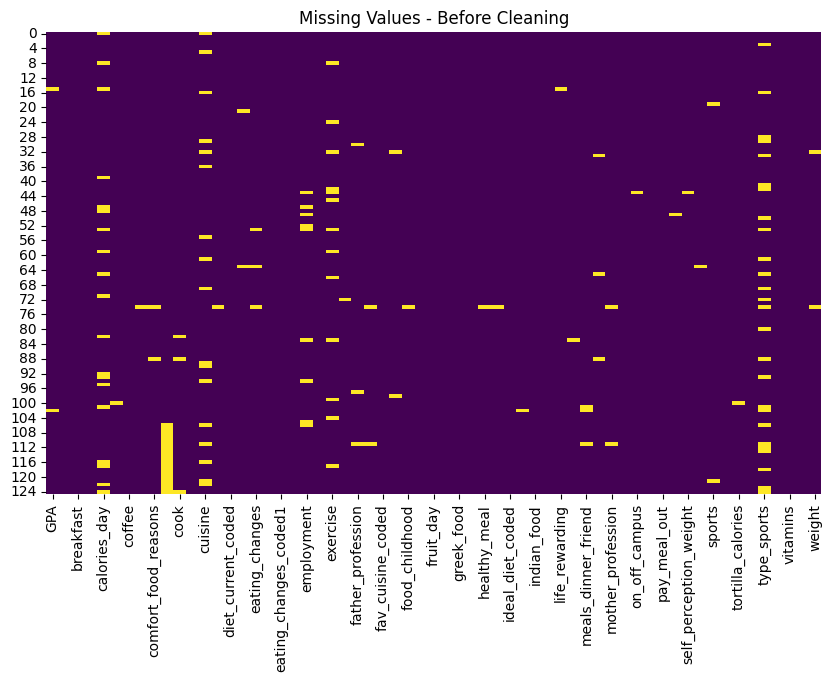

Final Cleaned Dataset Shape: (125, 61)
Missing values after cleaning:
 GPA                 0
Gender              0
breakfast           0
calories_chicken    0
calories_day        0
                   ..
type_sports         0
veggies_day         0
vitamins            0
waffle_calories     0
weight              0
Length: 61, dtype: int64


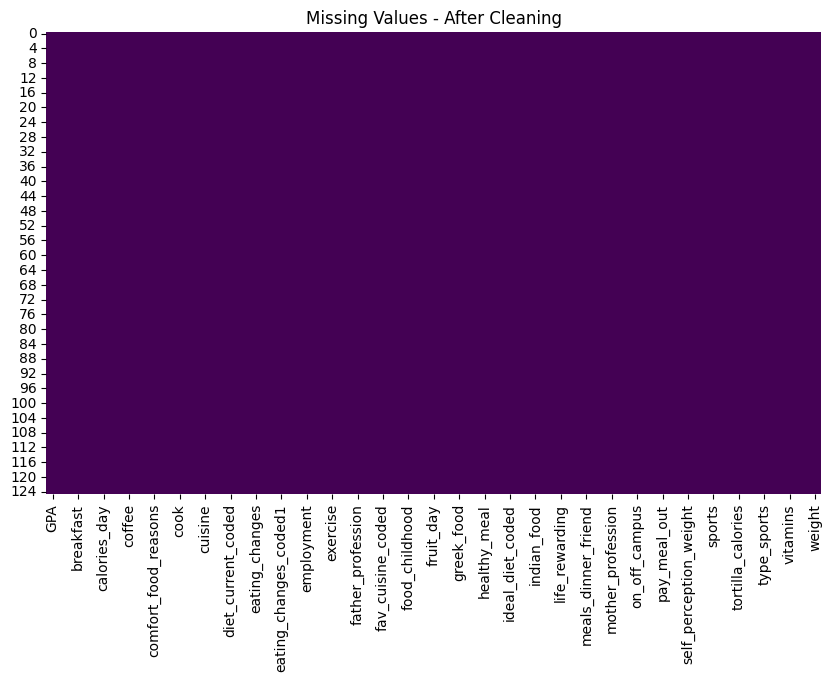

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("food_coded.csv")
print("Initial Dataset Shape:", df.shape)
df.head()
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - Before Cleaning")
plt.show()
df_mean = df.copy()
df_median = df.copy()
df_mode = df.copy()

numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fill with mean
for col in numeric_cols:
    df_mean[col] = df_mean[col].fillna(np.mean(df_mean[col]))

# Fill with median
for col in numeric_cols:
    df_median[col] = df_median[col].fillna(np.median(df_median[col]))

# Fill with mode (all columns)
for col in df.columns:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df_mode[col] = df_mode[col].fillna(mode_val[0])

        df_cleaned = df_mode.drop_duplicates()
        df_cleaned = df_cleaned.loc[:, ~df_cleaned.T.duplicated()]

print("Final Cleaned Dataset Shape:", df_cleaned.shape)
print("Missing values after cleaning:\n", df_cleaned.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values - After Cleaning")
plt.show()